    objective_1  objective_2      profit        vol
0    750.195007   -69.313713  750.195007 -69.313713
1    585.217102   -27.730057  585.217102 -27.730057
2    850.472534   -69.532997  850.472534 -69.532997
3    238.015091    -9.080212  238.015091  -9.080212
4    286.862488   -15.861475  286.862488 -15.861475
5    249.601242   -15.171124  249.601242 -15.171124
6    421.929657   -21.680664  421.929657 -21.680664
7    299.048798   -15.904307  299.048798 -15.904307
8    351.035004   -21.149303  351.035004 -21.149303
9    558.357422   -23.104996  558.357422 -23.104996
10   242.280716    -9.381027  242.280716  -9.381027
[750.1950073242188, 585.2171020507812, 850.4725341796875, 238.0150909423828, 286.86248779296875, 249.6012420654297, 421.9296569824219, 299.0487976074219, 351.0350036621094, 558.357421875, 242.2807159423828]
[-69.31371307373047, -27.730056762695312, -69.53299713134766, -9.080211639404297, -15.861474990844728, -15.171124458312988, -21.6806640625, -15.90430736541748, -21.14930

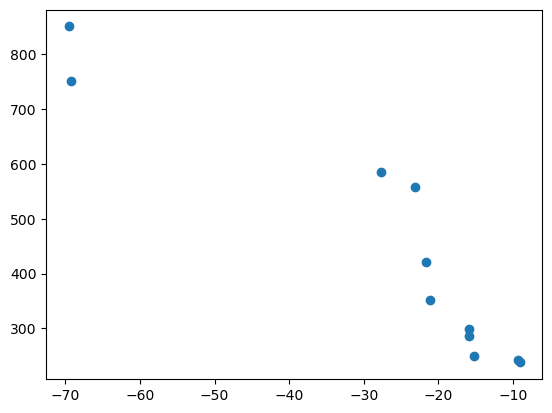

In [202]:
import pandas as pd
import math

pcn_30_model_path = "models/PCN_sweep_sp_81_r7vwgw1k_r7vwgw1k/PCN_model.pt"
# scenario sp
pareto_front_data = "pareto_front_100_ep.csv"
df = pd.read_csv(pareto_front_data)
df['profit'] = df['objective_1'].values
vals = df['profit'].tolist()
df['vol'] = df['objective_2'].values
vols = df['vol'].tolist()
print(df)
#vols = [abs(v) for v in vols]
print(vals)
print(vols)

import matplotlib.pyplot as plt
plt.scatter(vols, vals)

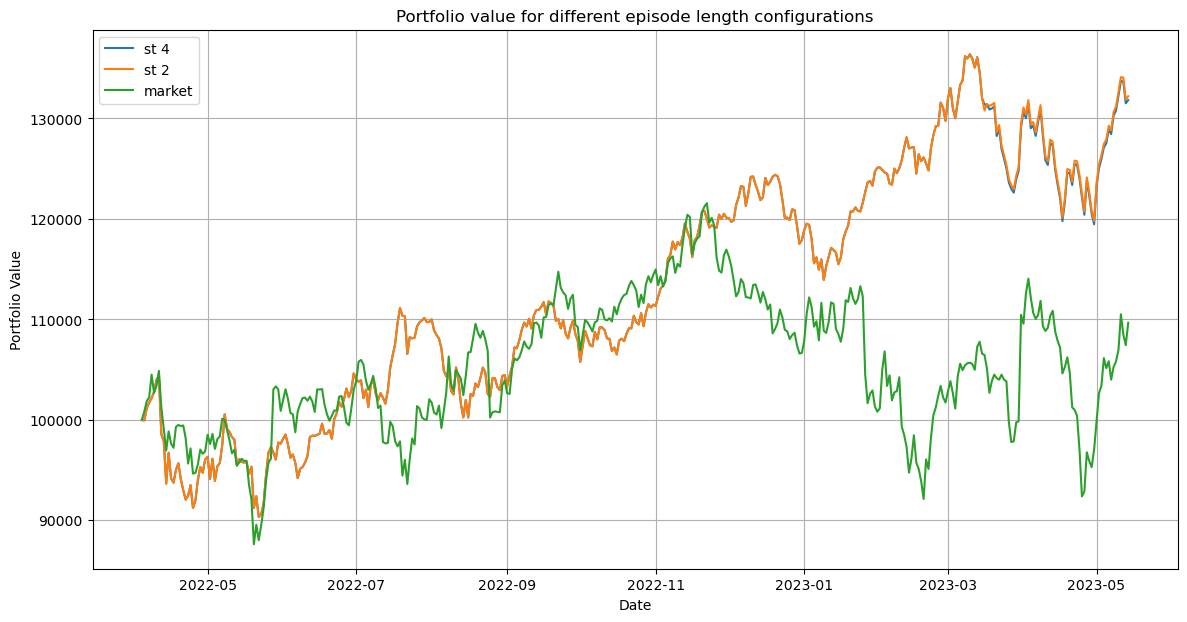

224    401
33       4
0        1
Name: actions, dtype: int64
224    403
33       2
0        1
Name: actions, dtype: int64


In [26]:
# results for 3 different solutions on the evaluation set
# strategy 4 [0.362748, -21.008167]
# strategy 2 [0.157298, -11.718796]

st_4 = "models/PCN_sweep_sp_81_r7vwgw1k_r7vwgw1k/strategy_4.csv"
st_2 = "models/PCN_sweep_sp_81_r7vwgw1k_r7vwgw1k/strategy_2.csv"


stocks = ['AAPL', 'MSFT', 'JNJ', 'PG', 'TSLA', 'NFLX', 'KO', 'V']
stocks = [x+" price" for x in stocks]

df = pd.read_csv(st_4)
df1 = pd.read_csv(st_2)
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df['cumulative market return'] = (1 + df['market_return']).cumprod()
# Calculate the market value over time
df['market value'] = initial_investment * df['cumulative market return']

date_range = pd.date_range(start='2022-04-04', periods=len(df), freq='D')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value'], label='st 4')
plt.plot(date_range, df1['portfolio value'], label='st 2')
plt.plot(date_range, df['market value'], label='market')
#plt.plot(date_range, df['market value'], label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for different episode length configurations')
plt.legend()
plt.grid(True)
plt.show()

print(df['actions'].value_counts())
print(df1['actions'].value_counts())

In [ ]:
# results for 3 different solutions on the evaluation set
# strategy 4 [0.362748, -21.008167]
# strategy 2 [0.157298, -11.718796]

st_4 = "models/PCN_sweep_sp_81_r7vwgw1k_r7vwgw1k/strategy_4.csv"
st_2 = "models/PCN_sweep_sp_81_r7vwgw1k_r7vwgw1k/strategy_2.csv"


stocks = ['AAPL', 'MSFT', 'JNJ', 'PG', 'TSLA', 'NFLX', 'KO', 'V']
stocks = [x+" price" for x in stocks]

df = pd.read_csv(st_4)
df1 = pd.read_csv(st_2)
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df['cumulative market return'] = (1 + df['market_return']).cumprod()
# Calculate the market value over time
df['market value'] = initial_investment * df['cumulative market return']

date_range = pd.date_range(start='2022-04-04', periods=len(df), freq='D')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value'], label='st 4')
plt.plot(date_range, df1['portfolio value'], label='st 2')
plt.plot(date_range, df['market value'], label='market')
#plt.plot(date_range, df['market value'], label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for different episode length configurations')
plt.legend()
plt.grid(True)
plt.show()

print(df['actions'].value_counts())
print(df1['actions'].value_counts())

In [47]:
import pandas as pd
import numpy as np
import copy

main_path_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_for_test"
main_path_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_for_test"
main_path_252 = "models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_for_test"
main_path = main_path_30

path_30 = "models/PCN_81_3uxyqqez_3uxyqqez/evaluation_metrics_for_anova"
path_100 = "models/PCN_81_g5dta60c_g5dta60c/evaluation_metrics_for_anova"
path_252 = "models/PCN_81_yr7ls6he_yr7ls6he/evaluation_metrics_for_anova"

ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_for_anova"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_for_anova"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_for_anova'

ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_for_anova_side"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_for_anova_side"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_for_anova_side'

pcn = "models/PCN_sweep_sp_17_v0244b2c_v0244b2c/evaluation_metrics_for_anova_side"
dqn = "models/DQN_sp_extended_17_06_15_24_d8hah8u1/evaluation_metrics_for_anova_side"
ppo = "models/PPO_sp_extended_81_06_15_24_pcr0nder/evaluation_metrics_for_anova_side"

pcn = "models/PCN_sweep_sp_17_v0244b2c_v0244b2c/evaluation_metrics_for_anova_bull"
dqn = "models/DQN_sp_extended_17_06_15_24_d8hah8u1/evaluation_metrics_for_anova_bull"
ppo = "models/PPO_sp_extended_81_06_15_24_pcr0nder/evaluation_metrics_for_anova_bull"

dqn_c = "models/DQN_crypto_81_06_17_24_ca8svpca/evaluation_metrics_for_anova"
ppo_c = "models/PPO_crypto_83_06_17_24_gzsbryxw/evaluation_metrics_for_anova"
pcn_c = "models/PCN_sweep_sp_81_tlhm6t79_tlhm6t79/evaluation_metrics_for_anova"


paths = [pcn_c, dqn_c, ppo_c]
output = []

for p in paths:
    main_path = p
    results_df = pd.DataFrame(columns=['Episode return', 'Maximal drawdown', 'Volatility', 'Sharpe Ratio', 'Calmar Ratio', 'Ulcer index', 'Transaction costs'])

    for i in range(30):
        path = f"{main_path}{i}.csv"
        df = pd.read_csv(path)
        # returns = []
        # for stock in stocks:
        #     returns = [f"{stock}_return"]
        #     df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

        # df["market_return"] = df[returns].mean(axis=1)
        # initial_investment = df.loc[0, 'portfolio value']
        # df['cumulative market return'] = (1 + df['market_return']).cumprod()
        # # Calculate the market value over time
        # df['market value'] = initial_investment * df['cumulative market return']

        df['portfolio return'] = df['portfolio value'].pct_change().fillna(0)
        initial_investment = df.loc[0, 'portfolio value']
        df['cumulative portfolio return'] = (1 + df['portfolio return']).cumprod()
        # Calculate the portfolio value over time
        #market_return = df['market value'].iloc[-1] / df['market value'].iloc[0] - 1
        # generate metrics
        df['daily_return'] = df['portfolio value'].pct_change()
        # Final Return
        final_return = df['portfolio value'].iloc[-1] / df['portfolio value'].iloc[0] - 1
        # Maximal Drawdown
        cumulative_return = (1 + df['daily_return']).cumprod()
        rolling_max = cumulative_return.cummax()
        drawdown = cumulative_return / rolling_max - 1
        max_drawdown = drawdown.min()
        # Average Volatility (annualized)
        avg_volatility = df['daily_return'].std() * np.sqrt(252)  # 252 trading days in a year
        # Sharpe Ratio
        risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
        excess_return = df['daily_return'].mean() - (risk_free_rate / 252)
        sharpe_ratio = excess_return / df['daily_return'].std() * np.sqrt(252)
        # Calmar Ratio
        calmar_ratio = excess_return / abs(max_drawdown)
        # Ulcer index
        drawdown_squared = drawdown**2
        ulcer_index = np.sqrt(np.mean(drawdown_squared))

        transaction_costs = df['transaction costs'].sum()/initial_investment

        results_df.loc[i] = [final_return, max_drawdown, avg_volatility, sharpe_ratio, calmar_ratio, ulcer_index, transaction_costs]
    output.append(copy.deepcopy(results_df))

lengths = ["PCN", "DQN", "PPO"]
for i, l in enumerate(lengths):
    output[i]['model'] = l
df1, df2, df3 = output
df_combined = pd.concat([df1, df2, df3])
df_combined.groupby('model').mean()


,Episode return,Maximal drawdown,Volatility,Sharpe Ratio,Calmar Ratio,Ulcer index,Transaction costs
model,,,,,,,
DQN,-0.009547,-0.258419,0.499680,0.163670,0.003820,0.144827,0.013591
PCN,0.022234,-0.239341,0.484651,0.430986,0.005097,0.135466,0.004540
PPO,0.090178,-0.234697,0.528996,0.707273,0.008158,0.128639,0.004414


   Episode return  Maximal drawdown  Volatility  Sharpe Ratio  Calmar Ratio  \
0       -0.188402         -0.312391    0.596097     -0.605300     -0.004583   
1        0.114661         -0.216303    0.516901      0.758156      0.007190   
2        0.016978         -0.196617    0.444418      0.293937      0.002636   
3        0.342063         -0.095303    0.286731      2.722434      0.032503   
4       -0.325310         -0.407212    0.616295     -1.328606     -0.007979   

   Ulcer index  Transaction costs model  
0     0.132223           0.003830   PCN  
1     0.114995           0.004909   PCN  
2     0.078348           0.004422   PCN  
3     0.034394           0.003936   PCN  
4     0.273204           0.003823   PCN  
ANOVA result for Episode return: F-statistic=2.1403759427406945, p-value=0.12376330800046667
Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DQN    PCN   0.0318 0

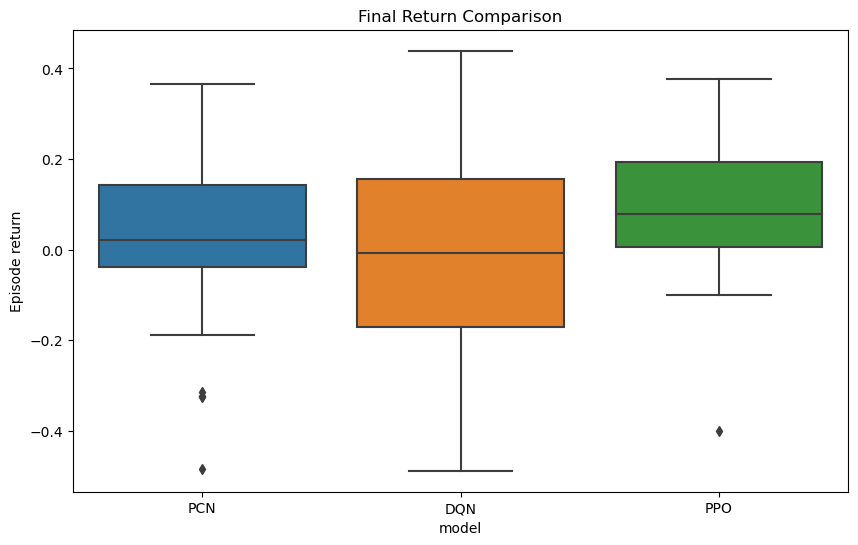

In [49]:


from scipy.stats import f_oneway
print(df1.head())
# Example for final return
f_stat, p_val = f_oneway(df1['Episode return'], df2['Episode return'], df3['Episode return'])
print(f'ANOVA result for Episode return: F-statistic={f_stat}, p-value={p_val}')
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Combine the data into one DataFrame for Tukey's HSD
combined_data = pd.concat([df1.assign(Strategy='PCN'),
                           df2.assign(Strategy='DQN'),
                           df3.assign(Strategy='PPO')])

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=combined_data['Episode return'], groups=combined_data['Strategy'], alpha=0.005)
print(str(tukey))



import seaborn as sns
import matplotlib.pyplot as plt

# Example for final return
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='Episode return', data=df_combined)
plt.title('Final Return Comparison')
plt.show()

ANOVA result for Volatility: F-statistic=1.9299850509489578, p-value=0.15131425452737843
          1         2         3
1  1.000000  0.058229  0.077473
2  0.058229  1.000000  1.000000
3  0.077473  1.000000  1.000000


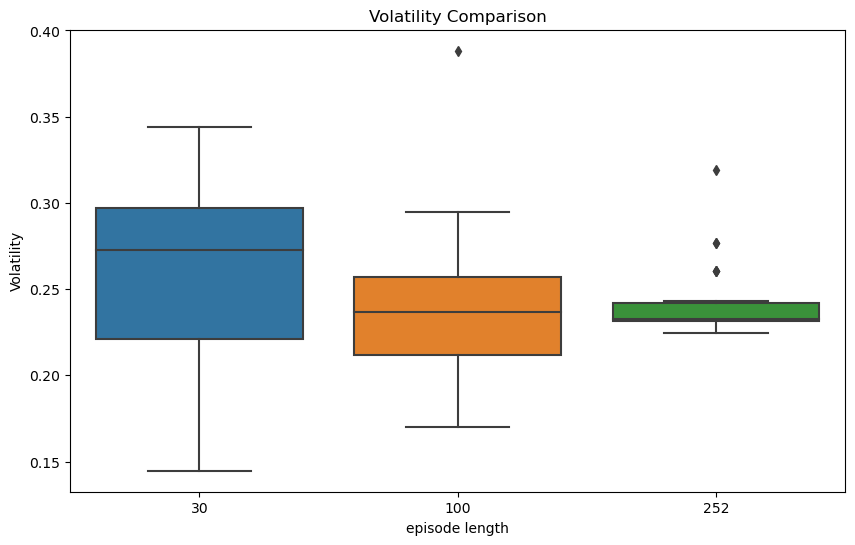

In [150]:
descriptive_stats = df_combined.groupby('episode length').describe()

from scipy.stats import f_oneway

# Example for final return
f_stat, p_val = f_oneway(df1['Volatility'], df2['Volatility'], df3['Volatility'])
print(f'ANOVA result for Volatility: F-statistic={f_stat}, p-value={p_val}')
import scikit_posthocs as sp

# Example for final return using the Kruskal-Wallis test
posthoc = sp.posthoc_dunn([df1['Volatility'], df2['Volatility'], df3['Volatility']], p_adjust='bonferroni')
print(posthoc)

import seaborn as sns
import matplotlib.pyplot as plt

# Example for final return
plt.figure(figsize=(10, 6))
sns.boxplot(x='episode length', y='Volatility', data=df_combined)
plt.title('Volatility Comparison')
plt.show()

In [ ]:
# EP 30
# Final Return        0.024791
# Maximal Drawdown   -0.066810
# Volatility          0.254496
# Sharpe Ratio        0.873237
# Calmar Ratio        0.024465
# Ulcer index         0.030963

# EP 100
# Final Return        0.062337
# Maximal Drawdown   -0.118362
# Volatility          0.236266
# Sharpe Ratio        0.694733
# Calmar Ratio        0.007370
# Ulcer index         0.047889

# EP 252
# Final Return        0.176316
# Maximal Drawdown   -0.165472
# Volatility          0.241780
# Sharpe Ratio        0.725008
# Calmar Ratio        0.004497
# Ulcer index         0.055234



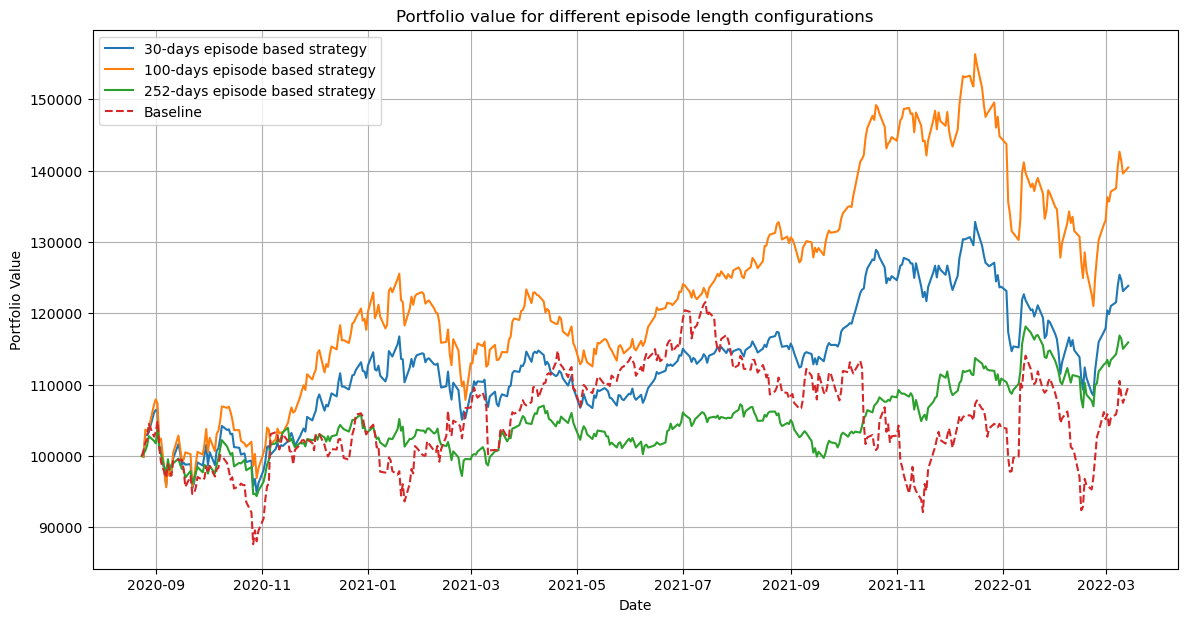

12894.208240226746
2234.264354476929
15432.067582191468
158    405
0        1
Name: actions, dtype: int64
401    175.600006
402    178.960007
403    177.770004
404    174.610001
405    174.309998
Name: AAPL price, dtype: float64


In [15]:
# back tests results on validation data
# ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_for_test.csv"
# ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_for_test.csv"
# ep_252 = "models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_for_test.csv"
ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_front.csv"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_front.csv"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_front.csv'
ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_backtest.csv"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_backtest.csv"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_backtest.csv'
ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_front.csv"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_front.csv"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_front.csv'
# ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_backtest_validation.csv"
# ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_backtest_validation.csv"
# ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_backtest_validation.csv'
df = pd.read_csv(ep_30)
df2 = pd.read_csv(ep_100)
df3 = pd.read_csv(ep_252)


stocks = ['AAPL', 'MSFT', 'JNJ', 'PG', 'TSLA', 'NFLX', 'KO', 'V']
stocks = [x+" price" for x in stocks]
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df['cumulative portfolio return'] = (1 + df['market_return']).cumprod()
# Calculate the portfolio value over time
df['market value'] = initial_investment * df['cumulative portfolio return']
# df['portfolio volatility'] = abs(df['risk reward'])

date_range = pd.date_range(start='2020-08-24', periods=len(df), freq='B')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value'], label='30-days episode based strategy')
plt.plot(date_range, df2['portfolio value'], label='100-days episode based strategy')
plt.plot(date_range, df3['portfolio value'], label='252-days episode based strategy')
plt.plot(date_range, df['market value'], label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for different episode length configurations')
plt.legend()
plt.grid(True)
plt.show()
print(df['transaction costs'].sum())
print(df2['transaction costs'].sum())
print(df3['transaction costs'].sum())
print(df2['actions'].value_counts())
print(df['AAPL price'].tail())


In [216]:
df["pct"] = df["portfolio value"].pct_change().fillna(0)
df2["pct"] = df2["portfolio value"].pct_change().fillna(0)
df3["pct"] = df3["portfolio value"].pct_change().fillna(0)
from scipy.stats import f_oneway

# Example for final return
f_stat, p_val = f_oneway(df['pct'], df2['pct'], df3['pct'])
print(f'ANOVA result for pct returns: F-statistic={f_stat}, p-value={p_val}')
import scikit_posthocs as sp

# Example for final return using the Kruskal-Wallis test
posthoc = sp.posthoc_dunn([df['pct'], df2['pct'], df3['pct']], p_adjust='bonferroni')
print(posthoc)

import seaborn as sns
import matplotlib.pyplot as plt

# Example for final return
plt.figure(figsize=(10, 6))
sns.boxplot(x='episode length', y='pct', data=df_combined)
plt.title('pct Comparison')
plt.show()

ANOVA result for pct returns: F-statistic=0.20592665439198748, p-value=0.8139211700211513
     1         2         3
1  1.0  1.000000  1.000000
2  1.0  1.000000  0.848478
3  1.0  0.848478  1.000000


ValueError: Could not interpret input 'pct'

<Figure size 1000x600 with 0 Axes>

In [203]:
import pandas as pd
import numpy as np
import copy


ep_30 = "models/PCN_sweep_sp_17_9s2d0yaa_9s2d0yaa/evaluation_metrics_for_anova_side"
ep_100 = "models/PCN_sweep_sp_17_y73vig0d_y73vig0d/evaluation_metrics_for_anova_side"
ep_252 = 'models/PCN_sweep_sp_17_vxj8pdbw_vxj8pdbw/evaluation_metrics_for_anova_side'

paths = [ep_30, ep_100, ep_252]
output = []

for p in paths:
    main_path = p
    results_df = pd.DataFrame(columns=['Final Return', 'Maximal Drawdown', 'Volatility', 'Sharpe Ratio', 'Calmar Ratio', 'Ulcer index', 'Transaction costs'])

    for i in range(30):
        path = f"{main_path}{i}.csv"
        df = pd.read_csv(path)
        stocks = ['AAPL', 'MSFT', 'JNJ', 'PG', 'TSLA', 'NFLX', 'KO', 'V']
        stocks = [x+" price" for x in stocks]
        returns = []
        for stock in stocks:
            returns = [f"{stock}_return"]
            df[f"{stock}_return"] = df[stock].pct_change().fillna(0)
        df["market_return"] = df[returns].mean(axis=1)
        initial_investment = df.loc[0, 'portfolio value']
        df['cumulative portfolio return'] = (1 + df['market_return']).cumprod()
        # Calculate the portfolio value over time
        df['market value'] = initial_investment * df['cumulative portfolio return']
        # generate metrics
        df['daily_return'] = df['market value'].pct_change()
        # Final Return
        final_return = df['market value'].iloc[-1] / df['market value'].iloc[0] - 1
        # Maximal Drawdown
        cumulative_return = (1 + df['daily_return']).cumprod()
        rolling_max = cumulative_return.cummax()
        drawdown = cumulative_return / rolling_max - 1
        max_drawdown = drawdown.min()
        # Average Volatility (annualized)
        avg_volatility = df['daily_return'].std() * np.sqrt(252)  # 252 trading days in a year
        # Sharpe Ratio
        risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
        excess_return = df['daily_return'].mean() - (risk_free_rate / 252)
        sharpe_ratio = excess_return / df['daily_return'].std() * np.sqrt(252)
        # Calmar Ratio
        calmar_ratio = excess_return / abs(max_drawdown)
        # Ulcer index
        drawdown_squared = drawdown**2
        ulcer_index = np.sqrt(np.mean(drawdown_squared))

        transaction_costs = df['transaction costs'].sum()/initial_investment

        results_df.loc[i] = [final_return, max_drawdown, avg_volatility, sharpe_ratio, calmar_ratio, ulcer_index, transaction_costs]

    #transaction_costs/=initial_investment
    output.append(copy.deepcopy(results_df))

lengths = [30, 100, 252]
for i, l in enumerate(lengths):
    output[i]['episode length'] = l
df1, df2, df3 = output
df_combined = pd.concat([df1, df2, df3])
df_combined.groupby('episode length').mean()


,Final Return,Maximal Drawdown,Volatility,Sharpe Ratio,Calmar Ratio,Ulcer index,Transaction costs
episode length,,,,,,,
30,0.020067,-0.061471,0.214141,1.397434,0.040415,0.028838,0.007685
100,0.049711,-0.104786,0.216388,0.721300,0.007160,0.049114,0.003968
252,0.143704,-0.162639,0.219915,0.714949,0.004625,0.061891,0.064812


In [211]:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(df_combined['Final Return'], df_combined['episode length'])
print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: 0.5619383632713558
P-value: 8.272450476193359e-09


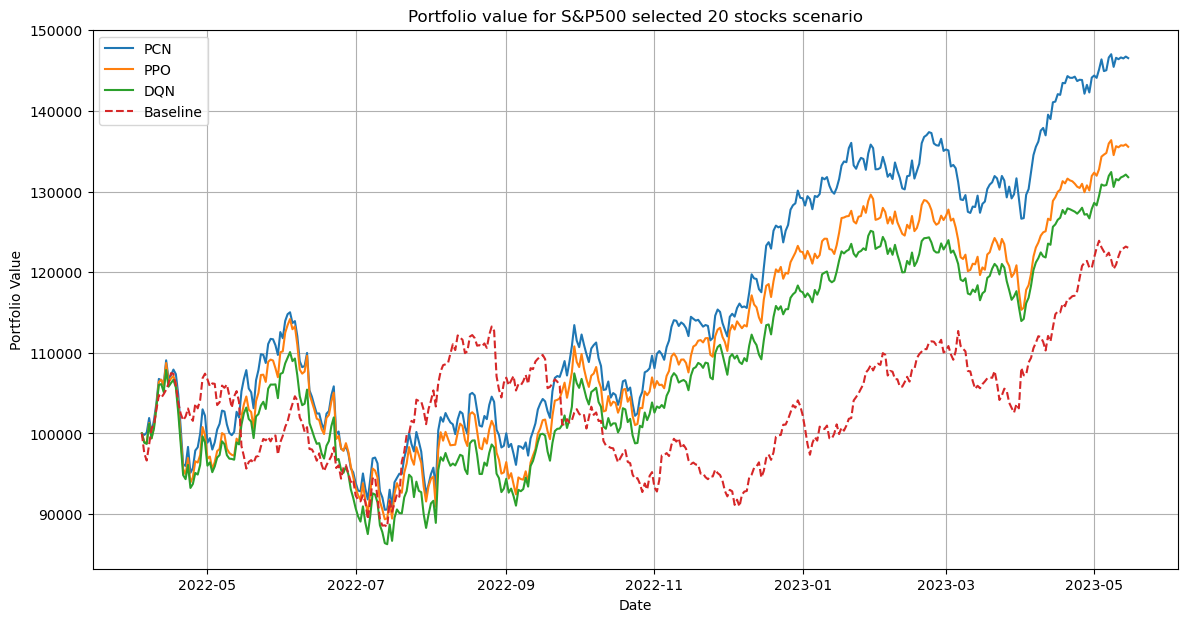

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


sp_PCN_100_best = "models/PCN_sweep_sp_57_xo7t4bkx_xo7t4bkx/evaluation_metrics.csv"


# PCN 100 new obs - does not change actions
new_obs_sp = "models/PCN_sweep_sp_17_oivusehp_oivusehp/evaluation_metrics.csv"
new_obs_sp_extended = "models/PCN_sweep_sp_17_v0244b2c_v0244b2c/evaluation_metrics.csv"
dqn_100 = "models/DQN_sp_extended_17_06_15_24_d8hah8u1/evaluation_metrics.csv"
ppo_100 = "models/PPO_sp_extended_81_06_15_24_pcr0nder/evaluation_metrics.csv"



path = new_obs_sp_extended

df = pd.read_csv(path)

stocks = ['AAPL',
        'MSFT',
        'JNJ',
        'PG',
        'TSLA',
        'NFLX',
        'KO',
        'V',
        'GOOGL',
        'AMZN',
        'META',
        'JPM',
        'UNH',
        'HD',
        'VZ',
        'DIS',
        'NVDA',
        'MA',
        'ADBE',
        'IBM']
stocks = [x+" price" for x in stocks]
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df['cumulative market return'] = (1 + df['market_return']).cumprod()
# Calculate the market value over time
df['market value'] = initial_investment * df['cumulative market return']
# df['portfolio volatility'] = abs(df['risk reward'])
df.to_csv(path[:-4]+"_processed.csv")

path = ppo_100

df1 = pd.read_csv(path)

returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df1[f"{stock}_return"] = df1[stock].pct_change().fillna(0)

df1["market_return"] = df1[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df1['cumulative market return'] = (1 + df1['market_return']).cumprod()
# Calculate the market value over time
df1['market value'] = initial_investment * df1['cumulative market return']
# df['portfolio volatility'] = abs(df['risk reward'])
df1.to_csv(path[:-4]+"_1_processed.csv")
path = dqn_100
df2 = pd.read_csv(path)

returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df2[f"{stock}_return"] = df2[stock].pct_change().fillna(0)

df2["market_return"] = df2[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df2['cumulative market return'] = (1 + df2['market_return']).cumprod()
# Calculate the market value over time
df2['market value'] = initial_investment * df2['cumulative market return']
# df['portfolio volatility'] = abs(df['risk reward'])
df2.to_csv(path[:-4]+"_2_processed.csv")
date_range = pd.date_range(start='2022-04-04', periods=len(df), freq='D')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value'], label='PCN')
plt.plot(date_range, df1['portfolio value'], label='PPO')
plt.plot(date_range, df2['portfolio value'], label='DQN')
plt.plot(date_range, df['market value'], label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for S&P500 selected 20 stocks scenario')
plt.legend()
plt.grid(True)
plt.show()

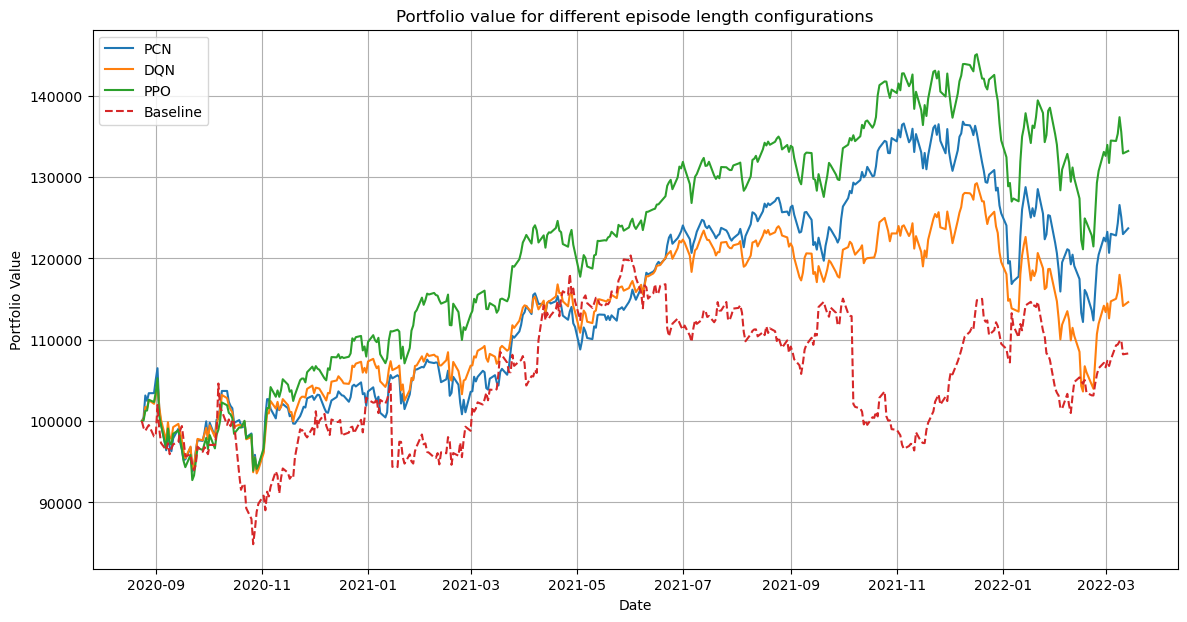

1752.5987998218534
55462.9623490963
18546.60818447495
595805     391
0            1
80867        1
856368       1
1025769      1
636447       1
678290       1
737868       1
188437       1
291980       1
896104       1
548186       1
975408       1
567715       1
60149        1
497833       1
Name: actions, dtype: int64
401    175.600006
402    178.960007
403    177.770004
404    174.610001
405    174.309998
Name: AAPL price, dtype: float64


In [8]:
# back tests results on validation data
pcn = "models/PCN_sweep_sp_17_v0244b2c_v0244b2c/evaluation_metrics_backtest_validation.csv"
dqn = "models/DQN_sp_extended_17_06_15_24_d8hah8u1/evaluation_metrics_backtest_validation.csv"
ppo = "models/PPO_sp_extended_81_06_15_24_pcr0nder/evaluation_metrics_backtest_validation.csv"
df = pd.read_csv(pcn)
df2 = pd.read_csv(dqn)
df3 = pd.read_csv(ppo)


stocks = ['AAPL',
        'MSFT',
        'JNJ',
        'PG',
        'TSLA',
        'NFLX',
        'KO',
        'V',
        'GOOGL',
        'AMZN',
        'META',
        'JPM',
        'UNH',
        'HD',
        'VZ',
        'DIS',
        'NVDA',
        'MA',
        'ADBE',
        'IBM']
stocks = [x+" price" for x in stocks]
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df['cumulative portfolio return'] = (1 + df['market_return']).cumprod()
# Calculate the portfolio value over time
df['market value'] = initial_investment * df['cumulative portfolio return']
# df['portfolio volatility'] = abs(df['risk reward'])

date_range = pd.date_range(start='2020-08-24', periods=len(df), freq='B')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value'], label='PCN')
plt.plot(date_range, df2['portfolio value']/10, label='DQN')
plt.plot(date_range, df3['portfolio value']/10, label='PPO')
plt.plot(date_range, df['market value'], label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for different episode length configurations')
plt.legend()
plt.grid(True)
plt.show()
print(df['transaction costs'].sum())
print(df2['transaction costs'].sum())
print(df3['transaction costs'].sum())
print(df2['actions'].value_counts())
print(df['AAPL price'].tail())


In [14]:
import pandas as pd
import numpy as np
import copy

pcn = "models/PCN_sweep_sp_17_v0244b2c_v0244b2c/evaluation_metrics_backtest_validation.csv"
dqn = "models/DQN_sp_extended_17_06_15_24_d8hah8u1/evaluation_metrics_backtest_validation.csv"
ppo = "models/PPO_sp_extended_81_06_15_24_pcr0nder/evaluation_metrics_backtest_validation.csv"

stocks = ['AAPL',
        'MSFT',
        'JNJ',
        'PG',
        'TSLA',
        'NFLX',
        'KO',
        'V',
        'GOOGL',
        'AMZN',
        'META',
        'JPM',
        'UNH',
        'HD',
        'VZ',
        'DIS',
        'NVDA',
        'MA',
        'ADBE',
        'IBM']
for i in range(len(stocks)):
    stocks[i] += " price"
paths = [pcn, dqn, ppo]
dfs = [pd.read_csv(path) for path in paths]
df_baselines = copy.deepcopy(dfs[0])
output = []
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df_baselines[f"{stock}_return"] = df_baselines[stock].pct_change().fillna(0)

df_baselines["market_return"] = df_baselines[returns].mean(axis=1)
initial_investment = df.loc[0, 'portfolio value']
df_baselines['cumulative market return'] = (1 + df_baselines['market_return']).cumprod()
# Calculate the market value over time
df_baselines['market value'] = initial_investment * df_baselines['cumulative market return']
df_baselines['portfolio value'] = df_baselines['market value']

dfs.append(df_baselines)
results_df = pd.DataFrame(columns=['Episode return', 'Maximal drawdown', 'Volatility', 'Sharpe Ratio', 'Calmar Ratio', 'Ulcer index', 'Transaction costs'])

for df in dfs:
    # returns = []
    # for stock in stocks:
    #     returns = [f"{stock}_return"]
    #     df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

    # df["market_return"] = df[returns].mean(axis=1)
    # initial_investment = df.loc[0, 'portfolio value']
    # df['cumulative market return'] = (1 + df['market_return']).cumprod()
    # # Calculate the market value over time
    # df['market value'] = initial_investment * df['cumulative market return']

    df['portfolio return'] = df['portfolio value'].pct_change().fillna(0)
    initial_investment = df.loc[0, 'portfolio value']
    df['cumulative portfolio return'] = (1 + df['portfolio return']).cumprod()
    # Calculate the portfolio value over time
    #market_return = df['market value'].iloc[-1] / df['market value'].iloc[0] - 1
    # generate metrics
    df['daily_return'] = df['portfolio value'].pct_change()
    # Final Return
    final_return = df['portfolio value'].iloc[-1] / df['portfolio value'].iloc[0] - 1
    # Maximal Drawdown
    cumulative_return = (1 + df['daily_return']).cumprod()
    rolling_max = cumulative_return.cummax()
    drawdown = cumulative_return / rolling_max - 1
    max_drawdown = drawdown.min()
    # Average Volatility (annualized)
    avg_volatility = df['daily_return'].std() * np.sqrt(252)  # 252 trading days in a year
    # Sharpe Ratio
    risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
    excess_return = df['daily_return'].mean() - (risk_free_rate / 252)
    sharpe_ratio = excess_return / df['daily_return'].std() * np.sqrt(252)
    # Calmar Ratio
    calmar_ratio = excess_return / abs(max_drawdown)
    # Ulcer index
    drawdown_squared = drawdown**2
    ulcer_index = np.sqrt(np.mean(drawdown_squared))

    transaction_costs = df['transaction costs'].sum()/initial_investment

    results_df.loc[i] = [final_return, max_drawdown, avg_volatility, sharpe_ratio, calmar_ratio, ulcer_index, transaction_costs]
    output.append(copy.deepcopy(results_df))

lengths = ["PCN", "DQN", "PPO", "Baseline"]
for i, l in enumerate(lengths):
    output[i]['model'] = l
df1, df2, df3, df4 = output
df_combined = pd.concat([df1, df2, df3, df4])
df_combined.groupby('model').mean()


,Episode return,Maximal drawdown,Volatility,Sharpe Ratio,Calmar Ratio,Ulcer index,Transaction costs
model,,,,,,,
Baseline,0.083203,-0.199251,0.239652,0.286904,0.001369,0.088635,0.001753
DQN,0.146408,-0.198237,0.185330,0.497510,0.001846,0.052417,0.055463
PCN,0.237094,-0.180046,0.202899,0.704717,0.003151,0.054825,0.017526
PPO,0.332225,-0.165338,0.194824,0.962566,0.004501,0.045494,0.018547


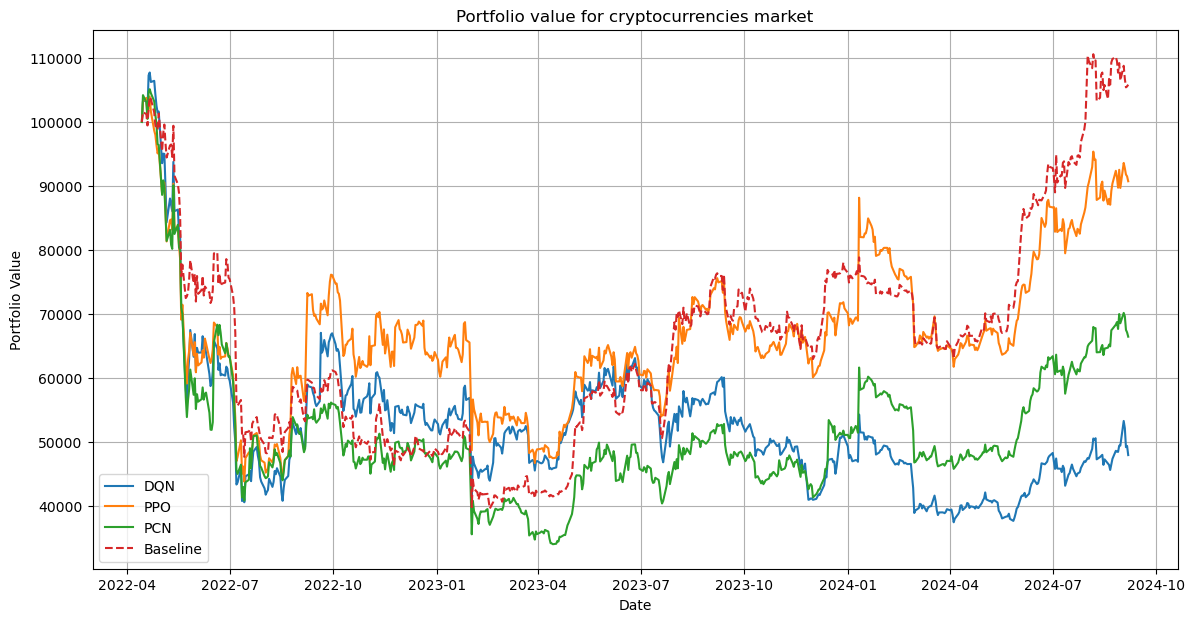

In [43]:
# back tests results on validation data
dqn_c = "models/DQN_crypto_81_06_17_24_ca8svpca/evaluation_metrics_backtest_validation.csv"
ppo_c = "models/PPO_crypto_83_06_17_24_gzsbryxw/evaluation_metrics_backtest_validation.csv"
pcn_c = "models/PCN_sweep_sp_81_tlhm6t79_tlhm6t79/evaluation_metrics_backtest_validation.csv"
df = pd.read_csv(dqn_c)
df2 = pd.read_csv(ppo_c)
df3 = pd.read_csv(pcn_c)


stocks = ["BTC-USD", "ETH-USD", "LTC-USD", "XRP-USD", "XMR-USD", 
           "DASH-USD", "ETC-USD", "ZEC-USD", "DCR-USD", "WAVES-USD"]
stocks = [x+" price" for x in stocks]
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

df["market_return"] = df["BTC-USD price_return"]
initial_investment = df.loc[0, 'portfolio value']
df['cumulative portfolio return'] = (1 + df['market_return']).cumprod()
# Calculate the portfolio value over time
df['market value'] = initial_investment * df['cumulative portfolio return']
# df['portfolio volatility'] = abs(df['risk reward'])

date_range = pd.date_range(start='2022-04-14', periods=len(df), freq='B')
plt.figure(figsize=(14, 7))
plt.plot(date_range, df['portfolio value']/10, label='DQN')
plt.plot(date_range, df2['portfolio value']/10, label='PPO')
plt.plot(date_range, df3['portfolio value']/10, label='PCN')
plt.plot(date_range, df['market value']/10, label='Baseline', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio value for cryptocurrencies market')
plt.legend()
plt.grid(True)
plt.show()




In [51]:
import pandas as pd
import numpy as np
import copy

dqn_c = "models/DQN_crypto_81_06_17_24_ca8svpca/evaluation_metrics_backtest_validation.csv"
ppo_c = "models/PPO_crypto_83_06_17_24_gzsbryxw/evaluation_metrics_backtest_validation.csv"
pcn_c = "models/PCN_sweep_sp_81_tlhm6t79_tlhm6t79/evaluation_metrics_backtest_validation.csv"
df = pd.read_csv(dqn_c)
df2 = pd.read_csv(ppo_c)
df3 = pd.read_csv(pcn_c)


stocks = ["BTC-USD", "ETH-USD", "LTC-USD", "XRP-USD", "XMR-USD", 
           "DASH-USD", "ETC-USD", "ZEC-USD", "DCR-USD", "WAVES-USD"]
stocks = [x+" price" for x in stocks]

paths = [pcn_c, dqn_c, ppo_c]
dfs = [pd.read_csv(path) for path in paths]
df_baselines = copy.deepcopy(dfs[0])
output = []
returns = []
for stock in stocks:
    returns = [f"{stock}_return"]
    df_baselines[f"{stock}_return"] = df_baselines[stock].pct_change().fillna(0)

df_baselines["market_return"] = df_baselines["BTC-USD price_return"]
initial_investment = df.loc[0, 'portfolio value']
df_baselines['cumulative market return'] = (1 + df_baselines['market_return']).cumprod()
# Calculate the market value over time
df_baselines['market value'] = initial_investment * df_baselines['cumulative market return']
df_baselines['portfolio value'] = df_baselines['market value']

dfs.append(df_baselines)
results_df = pd.DataFrame(columns=['Episode return', 'Maximal drawdown', 'Volatility', 'Sharpe Ratio', 'Calmar Ratio', 'Ulcer index', 'Transaction costs'])

for df in dfs:
    # returns = []
    # for stock in stocks:
    #     returns = [f"{stock}_return"]
    #     df[f"{stock}_return"] = df[stock].pct_change().fillna(0)

    # df["market_return"] = df[returns].mean(axis=1)
    # initial_investment = df.loc[0, 'portfolio value']
    # df['cumulative market return'] = (1 + df['market_return']).cumprod()
    # # Calculate the market value over time
    # df['market value'] = initial_investment * df['cumulative market return']

    df['portfolio return'] = df['portfolio value'].pct_change().fillna(0)
    initial_investment = df.loc[0, 'portfolio value']
    df['cumulative portfolio return'] = (1 + df['portfolio return']).cumprod()
    # Calculate the portfolio value over time
    #market_return = df['market value'].iloc[-1] / df['market value'].iloc[0] - 1
    # generate metrics
    df['daily_return'] = df['portfolio value'].pct_change()
    # Final Return
    final_return = df['portfolio value'].iloc[-1] / df['portfolio value'].iloc[0] - 1
    # Maximal Drawdown
    cumulative_return = (1 + df['daily_return']).cumprod()
    rolling_max = cumulative_return.cummax()
    drawdown = cumulative_return / rolling_max - 1
    max_drawdown = drawdown.min()
    # Average Volatility (annualized)
    avg_volatility = df['daily_return'].std() * np.sqrt(252)  # 252 trading days in a year
    # Sharpe Ratio
    risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
    excess_return = df['daily_return'].mean() - (risk_free_rate / 252)
    sharpe_ratio = excess_return / df['daily_return'].std() * np.sqrt(252)
    # Calmar Ratio
    calmar_ratio = excess_return / abs(max_drawdown)
    # Ulcer index
    drawdown_squared = drawdown**2
    ulcer_index = np.sqrt(np.mean(drawdown_squared))

    transaction_costs = df['transaction costs'].sum()/initial_investment

    results_df.loc[i] = [final_return, max_drawdown, avg_volatility, sharpe_ratio, calmar_ratio, ulcer_index, transaction_costs]
    output.append(copy.deepcopy(results_df))

lengths = ["PCN", "DQN", "PPO", "Baseline"]
for i, l in enumerate(lengths):
    output[i]['model'] = l
df1, df2, df3, df4 = output
df_combined = pd.concat([df1, df2, df3, df4])
df_combined.groupby('model').mean()


,Episode return,Maximal drawdown,Volatility,Sharpe Ratio,Calmar Ratio,Ulcer index,Transaction costs
model,,,,,,,
Baseline,0.058336,-0.619609,0.438091,0.249909,0.000701,0.399985,0.016676
DQN,-0.520984,-0.652934,0.552095,-0.276469,-0.000928,0.524619,0.049678
PCN,-0.335814,-0.676947,0.534190,-0.060808,-0.000190,0.522582,0.016676
PPO,-0.092721,-0.579102,0.544284,0.178254,0.000665,0.372467,0.019732


In [21]:
import utils

train, test = utils.generate_crypto()

print(test)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BTC-USD':                    Close
Date                    
2022-03-14  39666.753906
2022-03-15  39338.785156
2022-03-16  41143.929688
2022-03-17  40951.378906
2022-03-18  41801.156250
...                  ...
2023-12-27  43442.855469
2023-12-28  42627.855469
2023-12-29  42099.402344
2023-12-30  42156.90234